# Assignment 7 - Nov 14th

## Instructions
* The Assignment # 7 is in class (only)
* Worth 10 points
* The duration is 70 minutes
* You must upload your Jupiter Notebook solution within the class limit (12:30 to 1:45 pm).
* Late submissions are not allowed.
* The instructor will provide a unique number with a code. You must enter this information below. **Assigment without this information will not be graded.**

**General Conditions**
* The final grade will be normalized (10 * your score / max score) only if the max score is greater than 7 points.
* You can **only** talk and discuss with your classmates for the **first 15 minutes**.
* You can access all **your material** (open book)
* You are **not** allowed to use code helper sites like *stackoverflow*, *CodeReview,* etc.
* You are **not** allowed to use *ChatGPT*, *Co-pilot*, or any other *AI*
* You are **not** allowed to transfer files or share code with any other person (directly or indirectly)



In [206]:
# YOU MUST TO COMPLETE THE FOLLOWING INFORMATION
# YOUR FULL NAME
# NAME: Daniel Knopp
# IDENTIKEY: _______________________

# ENTER NUMBER AND CODE HERE
# NUMBER: 8 # number between 1 and 100 (randome)
# CODE:   lpcl # four letters (lower)

# the combination between NUMBER and CODE is unique

In [207]:
# Basic code you can use in your solution
# You dont need to modify this code.
# You can copy and paset this part of this code if you need it
class Node:

  def __init__(self, key, left=None, right=None):
    self.key = key
    self.left = left
    self.right = right

  def display(self):
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)

  def _display_aux(self):
      """Returns list of strings, width, height, and horizontal coordinate of the root."""
      # No child.
      if self.right is None and self.left is None:
          line = "%s" % self.key
          width = len(line)
          height = 1
          middle = width // 2
          return [line], width, height, middle
      # Only left child.
      if self.right is None:
          lines, n, p, x = self.left._display_aux()
          s = "%s" % self.key
          u = len(s)
          first_line = (x + 1) * " " + (n - x - 1) * "_" + s
          second_line = x * " " + "/" + (n - x - 1 + u) * " "
          shifted_lines = [line + u * " " for line in lines]
          return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2
      # Only right child.
      if self.left is None:
          lines, n, p, x = self.right._display_aux()
          s = "%s" % self.key
          u = len(s)
          first_line = s + x * "_" + (n - x) * " "
          second_line = (u + x) * " " + "\\" + (n - x - 1) * " "
          shifted_lines = [u * " " + line for line in lines]
          return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2
      # Two children.
      left, n, p, x = self.left._display_aux()
      right, m, q, y = self.right._display_aux()
      s = "%s" % self.key
      u = len(s)
      first_line = (x + 1) * " " + (n - x - 1) * "_" + s + y * "_" + (m - y) * " "
      second_line = (
          x * " " + "/" + (n - x - 1 + u + y) * " " + "\\" + (m - y - 1) * " "
      )
      if p < q:
          left += [n * " "] * (q - p)
      elif q < p:
          right += [m * " "] * (p - q)
      zipped_lines = zip(left, right)
      lines = [first_line, second_line] + [a + u * " " + b for a, b in zipped_lines]
      return lines, n + m + u, max(p, q) + 2, n + u // 2


  def __str__(self):
    return str(self.key)

  def PrintPreOrder(self, out): # modified to have ability to store output
    # print(self.key, end=" ")
    out += self.key
    if self.left: self.left.PrintPreOrder(out)
    if self.right: self.right.PrintPreOrder(out)

  def PrintInOrder(self, out): # modified to have ability to store output
    if self.left: self.left.PrintInOrder(out)
    # print(self.key, end=" ")
    out.append(self.key)
    if self.right: self.right.PrintInOrder(out)

  def PrintPostOrder(self):
    if self.left: self.left.PrintPostOrder()
    if self.right: self.right.PrintPostOrder()
    print(self.key, end=" ")

  # method used later for finding a node when the tree is not in BST order
  def find_a_node_in_order(self, val, node):
    if self.key == val: node.append(self)
    if self.left: self.left.find_a_node_in_order(val, node)
    if self.right: self.right.find_a_node_in_order(val, node)
     

In [208]:
def insertBST(node, key):
    if node is None: return Node(key)
    if key < node.key: node.left = insertBST(node.left, key)
    elif key > node.key: node.right = insertBST(node.right, key)
    return node

In [209]:
import random
randomBST=Node(random.randint(0, 100))

for _ in range(50):
    insertBST(randomBST,random.randint(0, 100))

## Q1 (2 pts). Find Kth Largest Value in BST

Write a function that takes in a Binary Search Tree (BST) and a positive integer k and returns the kth largest integer contained in the BST.

You can assume that there will only be integer values in the BST and that k is less than or equal to the number of nodes in the tree.


Each BST node has an integer value, a left child node, and a right child node. A node is said to be a valid BST node if and only if it satisfies the BST property: its value is strictly greater than the values of every node to its left; its value is strictly less than to the values of every node to its right; and its children nodes are either valid  BST nodes themselves or None / null.


**Sample Input**

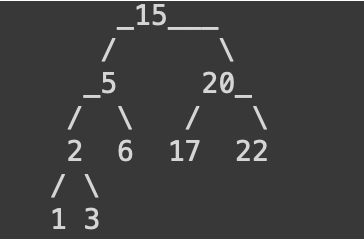

k=3

**Sample Output**

17

In [210]:
Q1Tree=Node(15)
insertBST(Q1Tree,5)
insertBST(Q1Tree,20)
insertBST(Q1Tree,2)
insertBST(Q1Tree,6)
insertBST(Q1Tree,17)
insertBST(Q1Tree,22)
insertBST(Q1Tree,1)
insertBST(Q1Tree,3)
Q1Tree.display()

    _15___   
   /      \  
  _5     20_ 
 /  \   /   \
 2  6  17  22
/ \          
1 3          


In [211]:
def findKthLargestValueInBst(tree, k):

    # Get a numerically ordered list using the in-order printing
    ordered_list = []
    tree.PrintInOrder(ordered_list)

    # ket the kth largest value (kth value from the end)
    return ordered_list[-k]

In [212]:
#Test you conde
#using Q1Tree and randomBST

print(findKthLargestValueInBst(Q1Tree, 3))

17


## Q2 (3 pts) Check and Repair BST

Q2.1 CCheck if a tree is a Binary Search Tree (BST). Check consistency and return True if the tree is a BST or false in any other case.

Q2.2 You're given a Binary Search Tree (BST) with at least two nodes and only nodes with unique values (no duplicate values). Exactly two nodes in the BST have had their values swapped, therefore breaking the BST. Write a function that returns a repaired tree version with all values on the correct nodes.

Your function can mutate the original tree; **you do not need to create a new one**.

Each BST node has an integer value, a left child node, and a right child node. A node is said to be a valid BST node if and only if it satisfies the BST property: its value is strictly greater than the values of every node to its left; its value is less than or equal to the values of every node to its right; and its children's nodes are either valid BST nodes themselves or None/null.


**Sample Input**

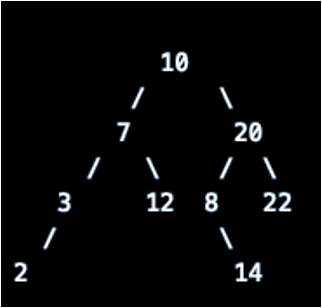


**Sample Output**

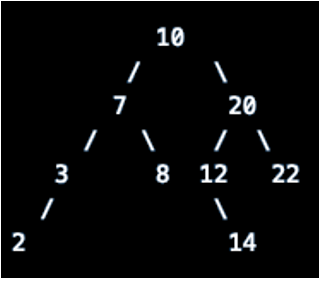



Q2.2 Questions
* Part1. Define your approach. Express it in 3-4 paragraphs. Add images if needed.

* Part2. Write your code and testing using the sample and, and if you want withh more cases.


Hint: You can swap values (Node.key) and not the node as object.



In [213]:
Q2Tree=Node(10)
Q2Tree.left=Node(7)
Q2Tree.left.left=Node(3)
Q2Tree.left.left.left=Node(2)
Q2Tree.left.right=Node(12)
Q2Tree.right=Node(20)
Q2Tree.right.left=Node(8)
Q2Tree.right.right=Node(22)
Q2Tree.right.left.right=Node(14)
Q2Tree.display()

   __10____   
  /        \  
  7_    __20_ 
 /  \  /     \
 3 12  8_   22
/        \    
2       14    


In [214]:
#Q2.1

def checkIfBST(tree):
    # Get the value in order according to a true BST
    original_list = []
    tree.PrintInOrder(original_list)

    # get the sorted list
    sorted_list = sorted(original_list)

    # If the original and sorted lists are the same, is a true BST - otherwise is not
    return True if original_list == sorted_list else False


checkIfBST(Q2Tree)

False

Q2.2 - Part 1. Response Here

My approach is very simple. I first can print the tree using the PrintInOrder() method. I have modified this method above so that I can store the output as a list. For a true BST this list will be in numerically sorted order. If I  compare the original list to a sorted version of the list, then I can tell if the tree is a true BST or not. If both lists are in the same order (equal), then the tree is a true BST - otherwise it is not and there are some issues.

For repairing the BST, I can do something similar to find the keys of nodes which are out of place. Then I can use a new method I created to get the node object corresponding to each of the out-of-order nodes and swap their keys (in code below).

In [215]:
# Q2.2- Part 2. Your code here


def repairBST(tree):
    # Get the value in order of the current BST
    original_list = []
    tree.PrintInOrder(original_list)

    # Get the true BST sorted order
    sorted_list = sorted(original_list)
    
    # Get the values of the 2 nodes which need to be swapped
    swapped_values = []
    for i in range(len(original_list)):
        if original_list[i] != sorted_list[i]:
            swapped_values.append(original_list[i])

    # Use the method defined above to get the nodes for each value to swap
    node_1 = []
    node_2 = []
    tree.find_a_node_in_order(swapped_values[0], node_1)
    tree.find_a_node_in_order(swapped_values[1], node_2)

    # Swap their keys
    node_1[0].key = swapped_values[1]
    node_2[0].key = swapped_values[0]

In [216]:
## Test your code here
##Provide both trees (display), brokenTree and fixedTree

print(checkIfBST(Q2Tree))
print(checkIfBST(randomBST))

print('--broken--')
Q2Tree.display()
repairBST(Q2Tree)
# Q2Tree=repairBST(Q2Tree)
print()
print('--fixed--')
Q2Tree.display()



False
True
--broken--
   __10____   
  /        \  
  7_    __20_ 
 /  \  /     \
 3 12  8_   22
/        \    
2       14    

--fixed--
   _10_____   
  /        \  
  7     __20_ 
 / \   /     \
 3 8  12_   22
/        \    
2       14    


## Q3 (3 pts) Rental Equipment (Laptop)

You're given a list of time intervals during which students at a school need a laptop. These time intervals are represented by pairs of Integers [start, end], where 0 < start < end. However, start and end don't represent real times; therefore, they may be greater than 24.

No two students can use a laptop at the same time, but immediately after a student is done using a laptop, another student can use that same laptop. For example, If one student rents a laptop during the time interval [0, 2] , another student can rent the same laptop during any time interval starting with 2.

Write a function that returns the minimum number of laptops that the school needs to rent such that all students will always have access to a laptop when they need one.

Write down all your assumptions if you have them or need them to solve the problem.

**Sample Input**


```
times =[
    [0, 2],
    [1, 4],
    [4, 6],
    [0, 4],
    [7, 8],
    [9, 11],
    [3, 10]
  ]
```





**Sample Output**
```
3
```


**Assumptions Here:**
I am assuming that the times are integers within the range (hourly reservations) and that a student can hand off the laptop to another student at the end of their time range (if end of one range and start of another overlap, doesn't count toward needing an additional laptop)

In [217]:
def laptopRentals(times):

    # Create a dictionary to keep track of times
    my_dict = {}

    # Loop over each list of ranges
    for rng in times:

        # Loop over each rime within the range, exclusive of the end (can hand off the laptop)
        for time in range(rng[0], rng[1]):
            # print(time)
            # If the value is not in the dictionary, initialize with 1
            if time not in my_dict.keys():

                my_dict[time] = 1

            else: # Else add 1 to the number of computers for this hour

                my_dict[time] += 1

    # Return the number of laptops needed
    return max(my_dict.values())

In [218]:
#Test your code
times =[
    [0, 2],
    [1, 4],
    [4, 6],
    [0, 4],
    [7, 8],
    [9, 11],
    [3, 10]
  ]
laptopRentals(times)

3

## Q4 (2 pts) Delete a Node for a BST

Delete a node from a BST and call it deleteNode.

you must consider three cases:

* Case i.   The node to be deleted has no child (no left or right node)
* Case ii.  The node to be deleted has only one child, either the left node or the right node.
* Case iii. The node to be deleted has two children, left and right.

In [219]:
Q4Tree=Node(15)
insertBST(Q4Tree,5)
insertBST(Q4Tree,20)
insertBST(Q4Tree,2)
insertBST(Q4Tree,6)
insertBST(Q4Tree,17)
insertBST(Q4Tree,22)
insertBST(Q4Tree,1)
insertBST(Q4Tree,3)
Q4Tree.display()

    _15___   
   /      \  
  _5     20_ 
 /  \   /   \
 2  6  17  22
/ \          
1 3          


In [220]:
def deleteNode(root,k):
    if root == None: return None
    if k < root.key: root.left  = deleteNode(root.left ,k)
    if k > root.key: root.right = deleteNode(root.right,k)
    if k == root.key:
        if root.left  == None and root.right == None: return None
        if root.left  == None                       : return root.right
        if root.right == None                       : return root.left
        # find the appropriate successor
        succ = root.right
        while succ.left != None: succ = succ.left # find min value in right subtree
        root.key = succ.key
        root.right = deleteNode(root.right,succ.key)
    return root

In [221]:
Q4Tree=deleteNode(Q4Tree,20)
Q4Tree.display()

    _15___ 
   /      \
  _5     22
 /  \   /  
 2  6  17  
/ \        
1 3        


In [222]:
Q4Tree=deleteNode(Q4Tree,1)
Q4Tree.display()

   _15___ 
  /      \
 _5     22
/  \   /  
2  6  17  
 \        
 3        
